In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [142]:
rng = np.random.default_rng(0)
x = rng.integers(low=0, high=1000, size=100)
y = rng.integers(low=0, high=1000, size=100)
p = rng.integers(low=0, high=100, size=100)
interest = list(zip(x,y,p))

In [225]:
def distance(first, second):
  sum = 0
  for i in range(2):
    sum += pow(first[i] - second[i], 2)
  return np.sqrt(sum)


def findCentroids(clusters):
  centroids = []
  for i in range(len(clusters)):
    curr = []
    for j in range(2):
      sum = 0
      for k in range(len(clusters[i])):
        sum += clusters[i][k][j]
      curr.append(sum/len(clusters[i]))
    centroids.append(curr)
  return centroids

def cluster(centroids, data):
  clusters = [[] for _ in range(len(centroids))]

  for i in range(len(data)):
    dist = float('inf')
    clust = 0
    house = data[i]
    for j in range(len(centroids)):
      cent = centroids[j]
      temp = distance(cent, house)
      if temp < dist:
        dist = temp
        clust = j
    clusters[clust].append(house)
  return clusters


def compareCentroids(first, second):
  for i in range(len(first)):
    for j in range(len(first[0])):
      if(first[i][j] != second[i][j]): return 0
  return 1

rng = np.random.default_rng(0)
def Kmeans(data, k):
  # Identify Centroids
  centroids = []
  # num = rng.integers(low=0, high=len(data), size=k)
  num = rng.choice(len(data), size=k, replace=False)
  for i in range(k):
    centroids.append(data[num[i]])
    
  # Cluster houses based on distance to centroid
  clusters = cluster(centroids, data)

  # Identify new Centroids by averages
  centroids = findCentroids(clusters)

  # Recalculate Clusters
  clusters = cluster(centroids, data)
  newCentroids = findCentroids(clusters)

  # Check if the centroids change
  # If centroids don't change then clusters can't change so we
  # know that we are done because clusters will be the same
  while(not compareCentroids(centroids, newCentroids)):
    clusters = cluster(newCentroids, data)
    centroids = newCentroids
    newCentroids = findCentroids(clusters)


  return clusters, centroids
    

In [221]:
# Checks if all points are in range of a satt
sat_range = 200
total_points = 100
def check_points(clusters, centroids):
  in_range = 0
  for i in range(len(clusters)):
    for j in clusters[i]:
      if distance(centroids[i], j) <= sat_range:
        in_range += 1
  return in_range > (.9*total_points)

def weight(clusters, centroids):
  weights = [0]*len(clusters)
  for i in range(len(clusters)):
    for j in range(len(clusters[i])):
      single = 0
      for k in range(len(centroids)):
        if distance(centroids[k], clusters[i][j]) <= sat_range:
          single += 1
      if single == 1:
        weights[i] += clusters[i][j][2]
  return weights

In [206]:
R = np.random.rand(1000)
G = np.random.rand(1000)
B = np.random.rand(1000)
colors = list(zip(R,G,B))

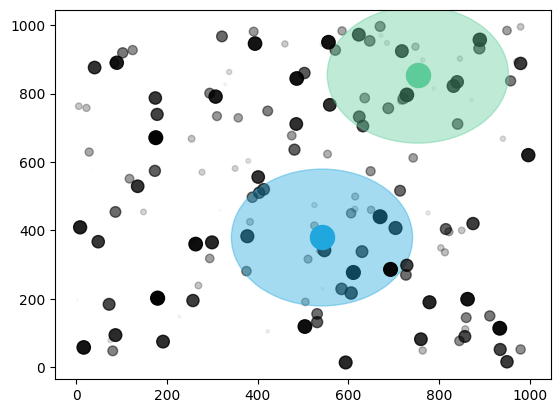

In [230]:
satts = 2
clusters, centroids = [], []
for j in range(satts, 20):
  clusters, centroids = Kmeans(interest, j)
  weights = weight(clusters, centroids)
  if check_points(clusters, centroids):
    figure, axes = plt.subplots()
    deleted = []
    for _ in range(j - satts):
      lowest = np.argmin(weights)
      weights[lowest] = float('inf')
      deleted.append(lowest)
    for i in range(len(clusters)):
      clusters[i] = np.array(clusters[i])
      axes.scatter(clusters[i][:,0], clusters[i][:,1], color="black", alpha=clusters[i][:,2]/100, s=clusters[i][:,2])
      if i not in deleted:
        axes.scatter(centroids[i][0], centroids[i][1], color=colors[i], s=300)
        axes.add_artist(plt.Circle((centroids[i][0], centroids[i][1]), 200, color=colors[i], alpha=.4))
    break


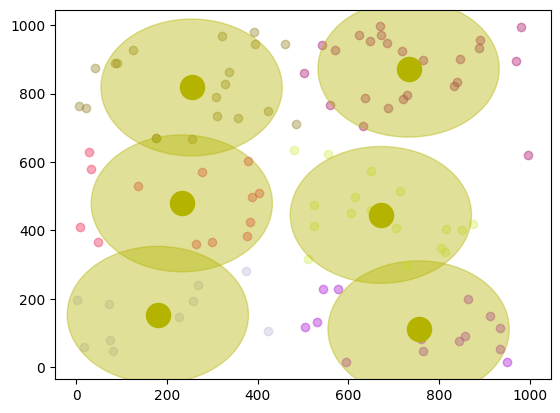

In [186]:
satts = 6
clusters, centroids = Kmeans(interest, satts)
figure, axes = plt.subplots()
for i in range(len(clusters)):
  clusters[i] = np.array(clusters[i])
  axes.scatter(clusters[i][:,0], clusters[i][:,1], color=colors[i], alpha=.4)
  axes.scatter(centroids[i][0], centroids[i][1], color=(0.7, 0.7, 0.0), s=300)
  axes.add_artist(plt.Circle((centroids[i][0], centroids[i][1]), 200, color=(0.7, 0.7, 0.0), alpha=.4))

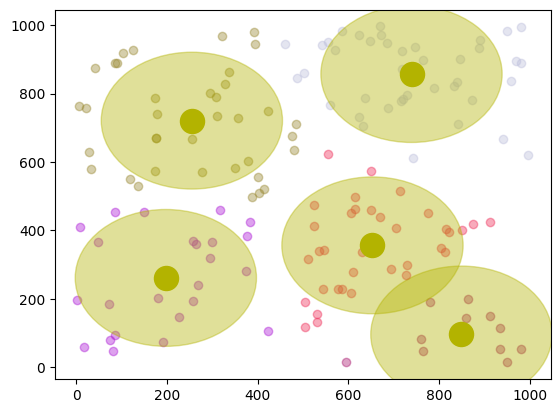

In [194]:
satts = 5
x = np.concatenate((x, rng.integers(low=0, high=1000, size=10)))
y = np.concatenate((y, rng.integers(low=0, high=1000, size=10)))
p = np.concatenate((p, rng.integers(low=0, high=100, size=10)))
interest = list(zip(x,y,p))
clusters, centroids = Kmeans(interest, satts)
figure, axes = plt.subplots()
for i in range(len(clusters)):
  clusters[i] = np.array(clusters[i])
  axes.scatter(clusters[i][:,0], clusters[i][:,1], color=colors[i], alpha=.4)
  axes.scatter(centroids[i][0], centroids[i][1], color=(0.7, 0.7, 0.0), s=300)
  axes.add_artist(plt.Circle((centroids[i][0], centroids[i][1]), 200, color=(0.7, 0.7, 0.0), alpha=.4))